In [1]:
# Analyze general statistics of the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [3]:
df = pd.read_csv('../data.csv')
df.head()

user  color    x    y           unix
0  7991502      8   42   42  1648817050315
1  2716099      6  999  999  1648817062671
2  8396602     13   44   42  1648817066626
3  7673969     30    2    2  1648817071703
4  1105203     13   23   23  1648817084409

In [4]:
f'Number of rows: {df.shape[0]/1e6:.2f} million'

'Number of rows: 160.46 million'

In [5]:
f'Number of unique users: {df.user.nunique()/1e6:.2f} million'

'Number of unique users: 10.38 million'

In [6]:
# Historgram counting the number of pixels placed by each user

In [7]:
number_of_pixels_placed = df.groupby('user').size()
hist = np.histogram(number_of_pixels_placed, bins=np.arange(800))

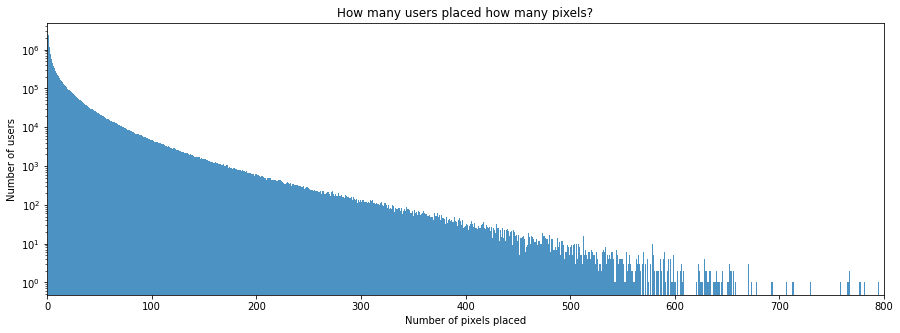

In [8]:
fig, ax = plt.subplots(figsize=(15, 5));
ax.bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0], color='tab:blue', alpha=0.8);
ax.set_xlabel('Number of pixels placed');
ax.set_ylabel('Number of users');
ax.set_title('How many users placed how many pixels?');
ax.set_yscale('log');
ax.set_xlim(0, 800);

In [9]:
# Heatmap

In [10]:
# Create an image indicating how often each tuple (x, y) appears in the dataframe
# The image dimensions are 2000x2000

pixel_frequency = np.empty((2000, 2000))

for row in tqdm(df.itertuples(), total=df.shape[0]):
    pixel_frequency[row.x, row.y] += 1

100%|██████████| 160455379/160455379 [03:06<00:00, 860998.40it/s]


In [11]:
log_pixel_frequency = np.log(pixel_frequency+1)

In [12]:
# Apply the inferno colormap to the pixel_frequency to add some color
log_pixel_frequency_inferno = plt.get_cmap('inferno')(log_pixel_frequency.T/np.max(log_pixel_frequency))
log_pixel_frequency_inferno = (log_pixel_frequency_inferno * 255).astype(np.uint8)

In [13]:
# Export the image to a PNG file
image = Image.fromarray(log_pixel_frequency_inferno)
image.save('./pixel_heatmap.png')